<h1 align="center">ECE 176 Project</h1>

# Table of Contents

1. Dataset Preparation: we will implement an American Sign Language (ASL) alphabet library.
2. Model: create a neural network architecture for our dataset.
3. Finetuning: find ways to improve the model.
4. Test/Visuals: create tests and look at which ASL letters were best recognized and why.
5. Conclusion/Discussion: discussion of results and possible further study.



## Acknowledgements
https://www.kaggle.com/grassknoted/aslalphabet_akash nagaraj_2018,
#### ASL Alphabet
https://www.kaggle.com/dsv/29550
10.34740/KAGGLE/DSV/29550


# Dataset Preparation

Initially, we will focus on implementing an American Sign Language (ASL) alphabet library. This involves loading the ASL alphabet dataset, a step that may require a few minutes upon the first attempt. Subsequently, the data will be cached, ensuring quicker access in future sessions. 


In [6]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  # Import the functional API

# ensure consistency across runs
from numpy.random import seed
seed(1)

In [7]:
class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None, mode='train'):
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.mode = mode
        self.img_labels = self._get_image_labels()


    def _get_image_labels(self):
        img_labels = []
        if self.mode == 'train':
            label = 0
            for root, dirs, files in os.walk(self.smg_dir):
                for subdir in sorted(dirs):
                    subdir_path = os.path.join(root, subdir)
                    for _, _, files in os.walk(subdir_path):
                        for file in files:
                            if file.lower().endswith(('png', 'jpg', 'jpeg')):
                                img_labels.append((os.path.join(subdir, file), label))
                    label += 1
        elif self.mode == 'test':
            for root, _, files in os.walk(self.img_dir):
                for file in files:
                    if file.lower().endswith(('png', 'jpg', 'jpeg')):
                        img_labels.append((file, None))
        return img_labels

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path, label = self.img_labels[idx]
        img_path = os.path.join(self.img_dir, img_path)
        image = Image.open(img_path).convert('RGB')  # Use PIL to open image
        if self.transform:
            image = self.transform(image)
        if self.target_transform and label is not None:
            label = self.target_transform(label)
        return image, label
    
class CustomTestImageDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.images = sorted(os.listdir(img_dir))  # Ensure the order is correct

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.images[idx])
        image = Image.open(img_path).convert('RGB')  # Use PIL to open and convert to RGB
        label = idx  # Assign label based on index, as mentioned
        if self.transform:
            image = self.transform(image)
        return image, label

In [8]:
### User, Yann or Sebastian ###

username = input("Yann or Sebastian? Enter your name as seen here")
print('You are currently in', username,'s path')

if username == 'Yann':
    img_directory='/home/ybaglinbunod/private/archive/asl_alphabet_train/asl_alphabet_train'
    img_directory2='/home/ybaglinbunod/private/archive/asl_alphabet_test/asl_alphabet_test'
else:
    img_directory='/home/sdcastaneda/private/asl_alphabet_train/asl_alphabet_train'
    img_directory2='/home/sdcastaneda/private/asl_alphabet_test/asl_alphabet_test'
    
print(img_directory)
###############################

train_transform = transforms.Compose([
    transforms.ToTensor(),
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
])
train_dataset = CustomImageDataset(
    img_dir= img_directory, 
    transform=train_transform, 
    mode='train'
)
test_dataset = CustomTestImageDataset(
    img_dir= img_directory2,  # Make sure to adjust this path
    transform=test_transform
)

## Next Datasets ##

Yann or Sebastian? Enter your name as seen heres
You are currently in s s path
/home/sdcastaneda/private/asl_alphabet_train/asl_alphabet_train


In [16]:
test_transformnew = transforms.Compose([
    transforms.ToTensor(),
])

test_datasetnew = CustomTestImageDataset(
    img_dir = '/home/sdcastaneda/private/asl-alphabet-test',
    transform=test_transformnew
)



test_transform2 = transforms.Compose([
    transforms.ToTensor(),
])


test_dataset2 = CustomTestImageDataset(
    img_dir = '/home/sdcastaneda/private/asl-alphabet-test2/A',
    transform=test_transform2
)

labels = ['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
test_datasets = {}

for label in labels:
    img_dir = f'/home/sdcastaneda/private/asl-alphabet-test2/{label}'
    test_datasets[label] = CustomTestImageDataset(img_dir=img_dir, transform=test_transform2

## Training Dataset

### Train Dataset has a length of 87,000 images

### These images are 200x200, 29 classes, 26 for A-Z 3 for SPACE, DELETE, and NOTHING


In [21]:
for i in range (0,87000,3000):
    image, label = train_dataset[i]
    image = transforms.ToPILImage()(image)
    plt.imshow(image)
    plt.title(f'Label: {label}')
    plt.axis('off')  # This hides the axis ticks and labels
    plt.show()

## Test Dataset

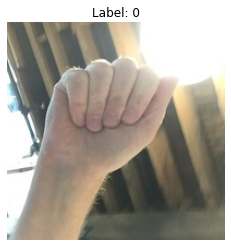

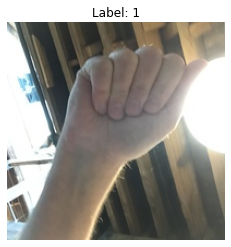

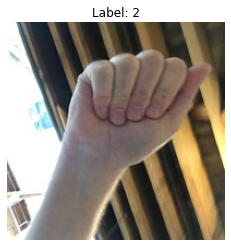

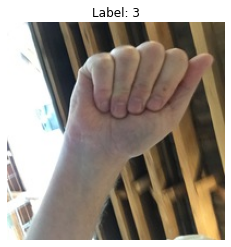

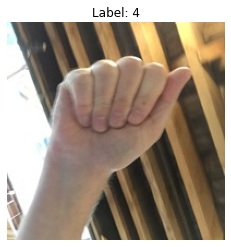

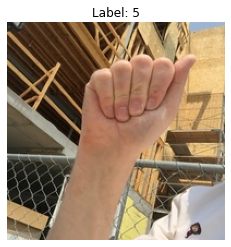

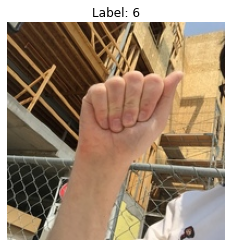

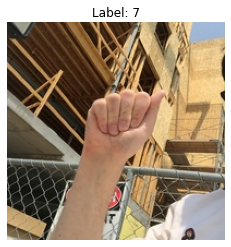

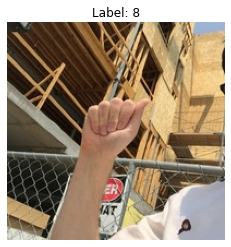

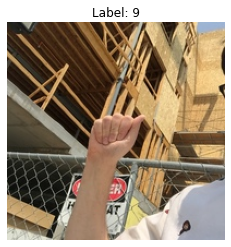

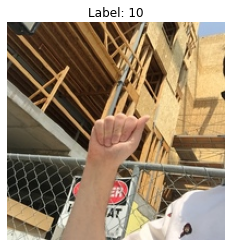

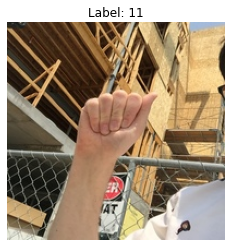

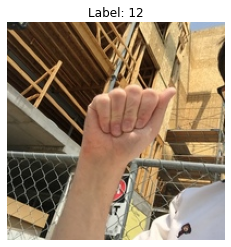

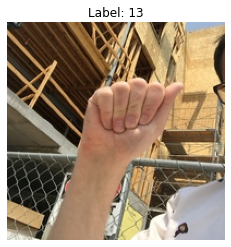

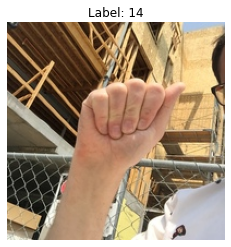

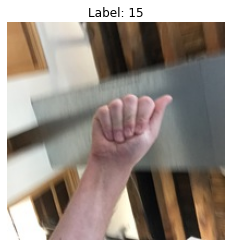

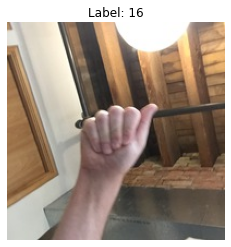

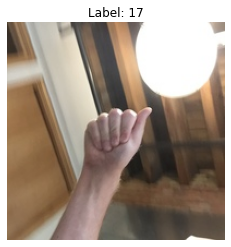

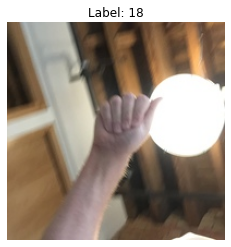

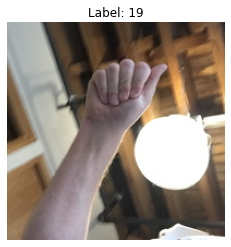

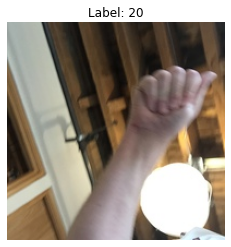

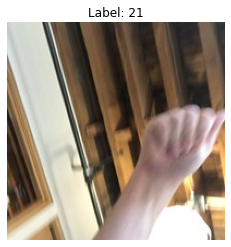

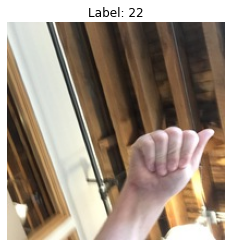

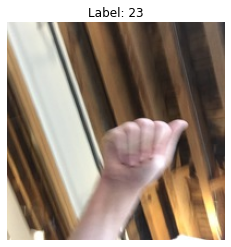

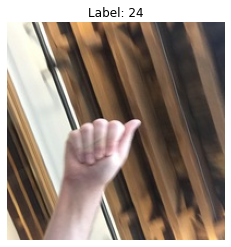

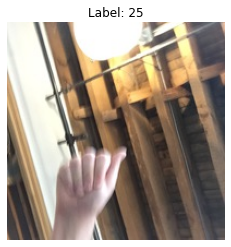

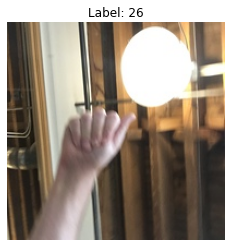

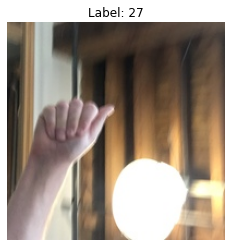

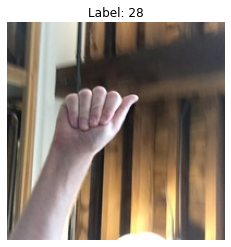

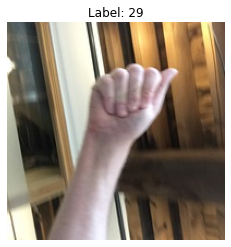

In [53]:
for i in range (0,30):
    image, label = test_dataset2[i]
    image = transforms.ToPILImage()(image)
    plt.imshow(image)
    plt.title(f'Label: {label}')
    plt.axis('off')  # This hides the axis ticks and labels
    plt.show()

## Data Loading

In [22]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True) ## Normal Kaggle test dataset (28 images)

test_dataloader4 = DataLoader(test_datasets, batch_size=64, shuffle=True)

In [23]:
USE_GPU = True
num_class = 29
dtype = torch.float32

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

using device: cuda


# Classification Functions

In [38]:
def train_part34(model, optimizer, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: The accuracy of the model
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, (x, y) in enumerate(train_dataloader):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

            if (t + 1) % print_every == 0:
                print('Epoch %d, Iteration %d, loss = %.4f' % (e, t + 1, loss.item()))
                check_accuracy_part34(test_dataloader4, model)
                print()
    return check_accuracy_part34(test_dataloader4, model)

In [39]:
def check_accuracy_part34(loader, model):  
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
    return acc

## Classification

In [ ]:

channel_1 = 32
channel_2 = 16
learning_rate = 1e-3
num_class = 29
model = None
optimizer = None

################################################################################
# TODO: Rewrite the 2-layer ConvNet with bias from Part III with the           #
# Sequential API.                                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


model = nn.Sequential(
    nn.Conv2d(3, channel_1, kernel_size=5, padding=2),
    nn.ReLU(inplace=True),
    nn.Conv2d(channel_1, channel_2, kernel_size=3, padding=1),
    nn.ReLU(inplace=True),
    nn.Flatten(),
    nn.Linear(200*200*channel_2, num_class)
)

optimizer = optim.SGD(model.parameters(), lr=learning_rate,
                     momentum=0.9, nesterov=True)

In [ ]:
train_part34(model, optimizer, epochs=1)

# Analysis